In [2]:
import numpy as np


# https://rdr.ucl.ac.uk/articles/dataset/Recording_with_a_Neuropixels_probe/25232962/1

# from params.py
# dat_path = 'Hopkins_20160722_g0_t0.imec.ap_CAR.bin'
# n_channels_dat = 385
# dtype = 'int16'
# offset = 0
# sample_rate = 30000
# hp_filtered = False

# https://github.com/kwikteam/phy-contrib/blob/master/docs/template-gui.md

inputfilename = 'Hopkins_20160722_g0_t0.imec.lf.bin'
nrows = 385
with open(inputfilename, 'rb') as fid:
    data_array = np.fromfile(fid, np.int16).reshape((-1, nrows)).T
data_array.shape

(385, 9434064)

In [3]:
chanMap = np.load('channel_map.npy').ravel() # get rid of 2nd dim from matlab
chanMap.shape

(374,)

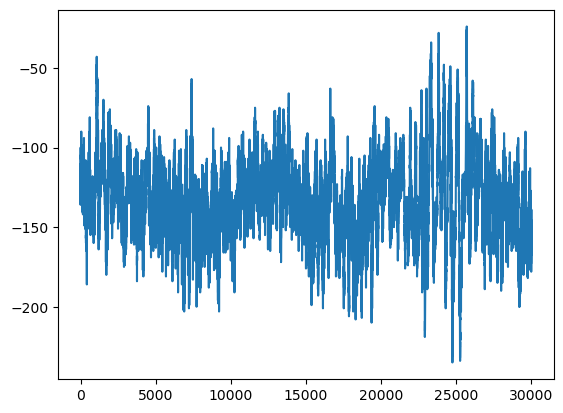

In [7]:
import matplotlib.pyplot as plt
plt.plot(data_array[chanMap[0],1:30000])

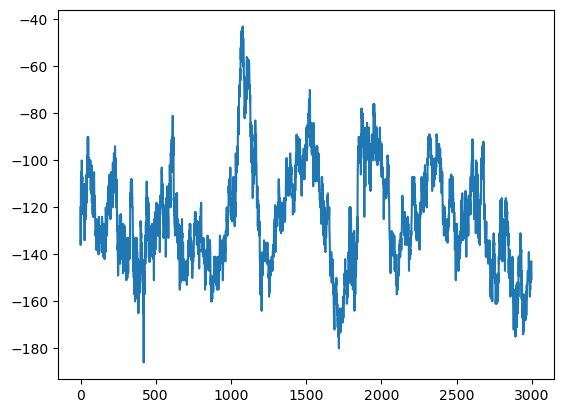

In [4]:
plt.plot(data_array[chanMap[0],1:3000])

In [4]:
spk_ts = np.load('spike_times.npy').ravel() # get rid of unitary 2nd dim from matlab
spk_ts.shape

(13403355,)

In [5]:
chanPos = np.load('channel_positions.npy')
chanPos.shape

(374, 2)

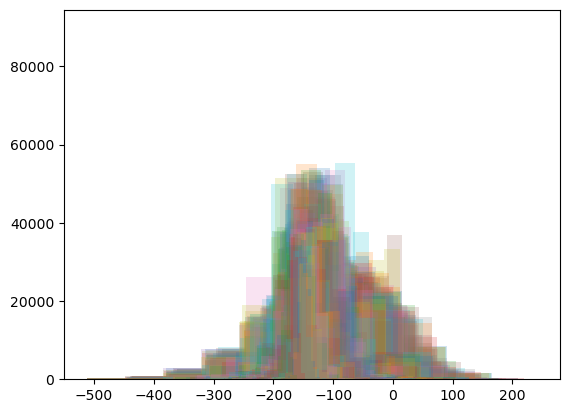

In [9]:
for ci in chanMap:
    plt.hist(data_array[ci,:90000],alpha=.2)

unfiltered extracellular data


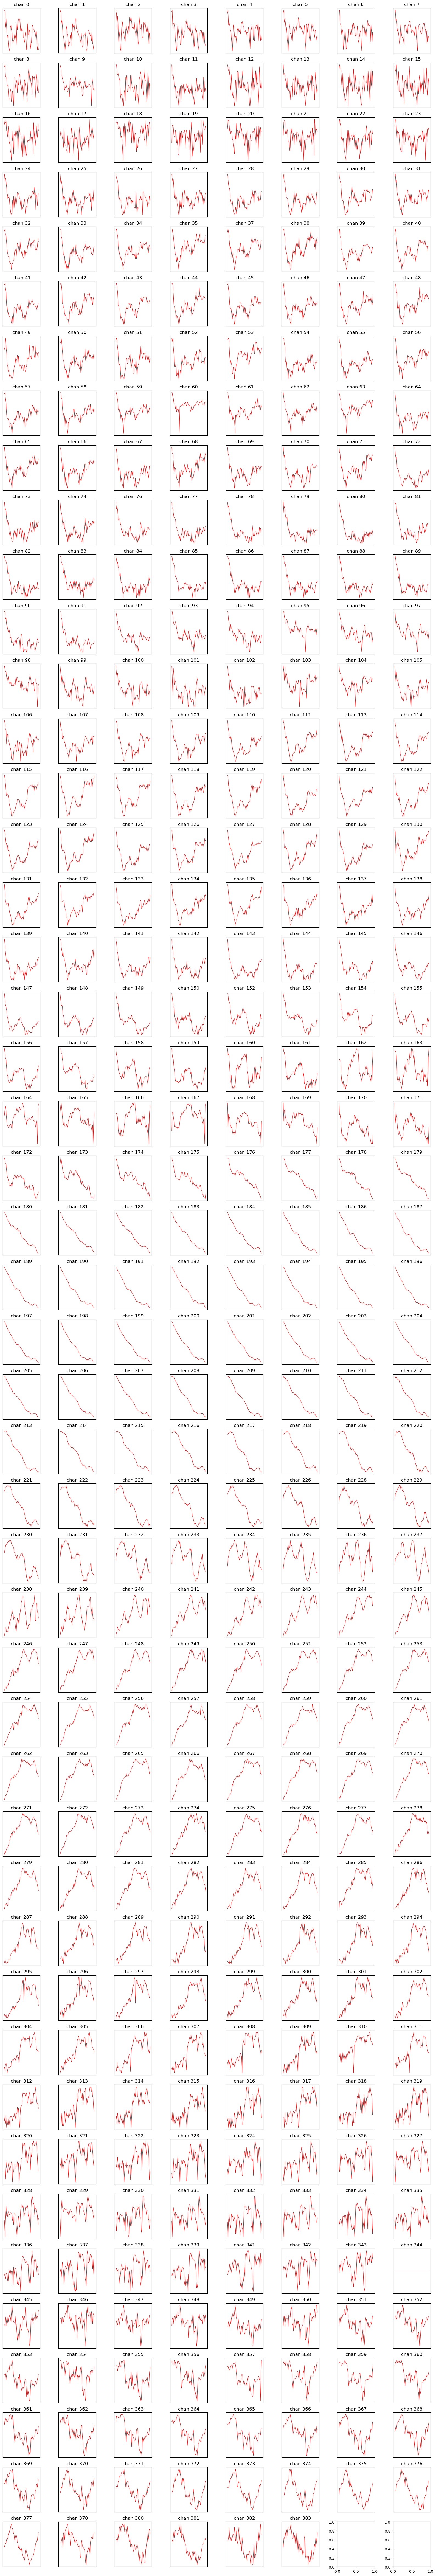

In [8]:
### Plot ALL channels each in a separate subplot within a time window around a juxta spike
## UNFILTERED DATA

spike_i = 10

Sampling_frequency = 30000
ncols = 8
nchannels = len(chanMap)
nrows = int(np.ceil(nchannels/ncols))
f, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2))

num_of_points_in_spike_trig_ivm = 64
window_half_size = num_of_points_in_spike_trig_ivm//2 #1 ms = 30
ix = spk_ts[spike_i]
window_ixs = np.arange(ix - window_half_size, ix + window_half_size +  int(window_half_size % 2 == 1)).astype('int')

# # get common y scale for all channels?
# ymin, ymax = extra_Volts[:,window_ixs].min(), extra_Volts[:,window_ixs].max()

for ci,chan_i in enumerate(chanMap):
    ax = axes.ravel()[ci]

    ax.plot(window_ixs / Sampling_frequency, data_array[chan_i,window_ixs], c='r', lw=0.75, label='extra')
    
    ax.set(xticks=[], yticks=[], title=f'chan {chan_i}')
#     ax.set(ylim=(ymin, ymax))
f.tight_layout()
print('unfiltered extracellular data')
plt.show()

### Kilosort preprocessing

https://github.com/cortex-lab/KiloSort/blob/master/preprocessData.m

see also https://github.com/MouseLand/Kilosort/blob/main/kilosort/run_kilosort.py


In [ ]:
# from master_file.m
ops.fs                  = 30000;        % sampling rate
ops.fshigh              = 300;   % frequency for high pass filtering

# from Kilosort's preprocessData.m
[b1, a1] = butter(3, ops.fshigh/ops.fs*2, 'high');